# **kth Nearest Neighbour Implementation**



In [1]:
# importing reqd libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading data from dataset
data = pd.read_csv('Social_Network_Ads.csv');
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Taking input columns
X = data.iloc[:, 2 : 4].values
X.shape

(400, 2)

In [4]:
# Storing output column in y
y = data.iloc[:, -1].values
y.shape

(400,)

In [5]:
# Cross Validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [6]:
# Training data
X_train.shape

(320, 2)

In [7]:
X_test.shape

(80, 2)

In [8]:
# Standardizing the attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.43657601,  2.29520618],
       [-0.88763558, -0.73834459],
       [ 1.00409526,  1.97740563],
       [-0.98222212,  0.53285764],
       [-0.0363567 ,  0.15727516],
       [ 1.0986818 ,  2.0640785 ],
       [-0.6984625 , -0.21830731],
       [ 0.90950872, -0.56499883],
       [-0.22552979, -1.43172762],
       [-0.79304904,  0.38840284],
       [ 0.05822984, -0.13163444],
       [-0.98222212, -0.33387115],
       [-0.22552979, -0.30498019],
       [ 0.43657601, -0.13163444],
       [ 0.15281638, -0.79612651],
       [ 0.43657601, -0.47832595],
       [-0.22552979,  2.23742426],
       [ 2.13913377, -0.79612651],
       [ 1.38244143,  2.32409714],
       [-0.22552979, -0.91169035],
       [-1.45515484, -0.18941635],
       [-1.36056829, -0.10274348],
       [ 0.72033564, -1.08503611],
       [-0.22552979, -0.47832595],
       [-0.13094324,  0.8506582 ],
       [ 1.66620106,  1.60182315],
       [ 0.90950872, -1.02725419],
       [-1.833501  , -0.04496156],
       [ 0.90950872,

In [10]:
X_test = scaler.fit_transform(X_test)
X_test

array([[-1.17658549, -0.51993327],
       [-0.27441131, -0.64607326],
       [ 2.1313865 ,  0.39458166],
       [ 0.12655499,  0.01616169],
       [ 0.02631341,  0.14230168],
       [ 0.02631341,  2.00286652],
       [ 0.92848759,  2.22361151],
       [-0.77561919, -1.74979817],
       [-1.5775518 , -1.59212318],
       [ 0.12655499, -0.42532828],
       [-0.37465289,  0.04769668],
       [-0.57513604, -0.61453826],
       [-0.37465289, -1.52905319],
       [ 2.1313865 , -0.89835324],
       [ 0.72800444,  1.46677157],
       [-1.17658549,  0.42611665],
       [ 0.82824602, -0.67760826],
       [-1.17658549, -0.42532828],
       [-0.97610234,  0.14230168],
       [-0.37465289, -0.39379328],
       [-0.17416974, -0.48839827],
       [-1.47731022, -0.48839827],
       [-0.97610234, -1.3398432 ],
       [ 1.93090335,  2.3182165 ],
       [-0.07392816, -0.36225828],
       [ 0.72800444, -1.49751819],
       [ 2.1313865 , -1.15063322],
       [ 0.82824602,  1.0883516 ],
       [-0.17416974,

# M1. k value from sqrt of total number of inputs

In [11]:
# Method 1 of k Calculation
np.sqrt(X_train.shape[0])

np.float64(17.88854381999832)

In [12]:
k = 17

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = k)

In [14]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [15]:
y_pred = knn.predict(X_test)

In [16]:
y_pred.shape

(80,)

In [17]:
y_test.shape

(80,)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9125

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[48,  3],
       [ 4, 25]])

# M2. k value by Trial and Error

In [20]:
accuracy = []

for i in range (1, 26):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy_i = accuracy_score(y_test, y_pred)
  accuracy.append(accuracy_i)

In [21]:
accuracy

[0.875,
 0.825,
 0.9125,
 0.9125,
 0.925,
 0.9125,
 0.9125,
 0.925,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125]

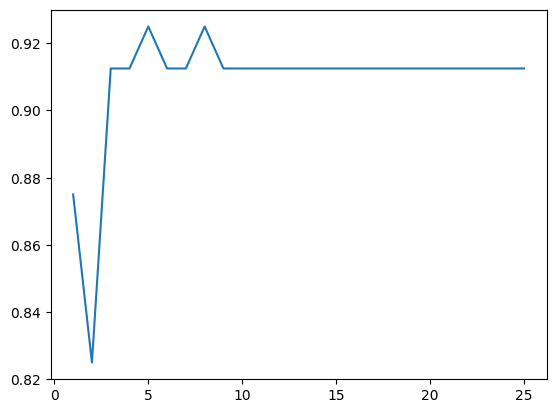

In [22]:
plt.plot(range(1, 26), accuracy)

In [23]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)


0.9125

# Predicting class for Query Point(s)

In [24]:
def predict_output():
  age = int(input("Enter the age: "))
  salary = int(input("Enter the salary: "))

  X_new = np.array([[age], [salary]]).reshape(1, 2)
  X_new = scaler.transform(X_new)

  return knn.predict(X_new)[0]

In [25]:
predict_output()

np.int64(0)